## Part 2 - Data Analysis

The data for used in this notebook can be created and found by running the 'Part 2 - Data Cleaning' notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import the cleaned dataset

In [2]:
adult = pd.read_csv('../Data Cleaning/adult_modified.csv')
adult.head()

,Unnamed: 0,age,hoursPerWeek,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,...,x0_Tech-support,x0_Transport-moving,x0_Amer-Indian-Eskimo,x0_Asian-Pac-Islander,x0_Black,x0_Other,x0_White,x0_Female,x0_Male,income
0,0,-1.026694,-0.078962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,1,-0.042154,0.753612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,2,-0.799493,-0.078962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,3,0.412250,-0.078962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,4,-0.345089,-0.911536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [3]:
adult.columns

Index(['Unnamed: 0', 'age', 'hoursPerWeek', 'x0_Federal-gov', 'x0_Local-gov',
       'x0_Private', 'x0_Self-emp-inc', 'x0_Self-emp-not-inc', 'x0_State-gov',
       'x0_Without-pay', 'x0_10th', 'x0_11th', 'x0_12th', 'x0_1st-4th',
       'x0_5th-6th', 'x0_7th-8th', 'x0_9th', 'x0_Assoc-acdm', 'x0_Assoc-voc',
       'x0_Bachelors', 'x0_Doctorate', 'x0_HS-grad', 'x0_Masters',
       'x0_Preschool', 'x0_Prof-school', 'x0_Some-college', 'x0_Divorced',
       'x0_Married-AF-spouse', 'x0_Married-civ-spouse',
       'x0_Married-spouse-absent', 'x0_Never-married', 'x0_Separated',
       'x0_Widowed', 'x0_Adm-clerical', 'x0_Armed-Forces', 'x0_Craft-repair',
       'x0_Exec-managerial', 'x0_Farming-fishing', 'x0_Handlers-cleaners',
       'x0_Machine-op-inspct', 'x0_Other-service', 'x0_Priv-house-serv',
       'x0_Prof-specialty', 'x0_Protective-serv', 'x0_Sales',
       'x0_Tech-support', 'x0_Transport-moving', 'x0_Amer-Indian-Eskimo',
       'x0_Asian-Pac-Islander', 'x0_Black', 'x0_Other', 'x0_Wh

In [4]:
# Delete the first column because it is reiterating indexes
adult.drop(columns = ['Unnamed: 0'], inplace = True)
adult.head()

,age,hoursPerWeek,x0_Federal-gov,x0_Local-gov,x0_Private,x0_Self-emp-inc,x0_Self-emp-not-inc,x0_State-gov,x0_Without-pay,x0_10th,...,x0_Tech-support,x0_Transport-moving,x0_Amer-Indian-Eskimo,x0_Asian-Pac-Islander,x0_Black,x0_Other,x0_White,x0_Female,x0_Male,income
0,-1.026694,-0.078962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,-0.042154,0.753612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,-0.799493,-0.078962,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
3,0.412250,-0.078962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
4,-0.345089,-0.911536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


## Creating x and y Variables

In [5]:
x = adult.iloc[:, :-1].values
x

array([[-1.02669442, -0.0789619 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.04215355,  0.75361249,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.79949268, -0.0789619 ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.47252472, -0.0789619 ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.25389616, -1.74411069,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.01812124, -0.0789619 ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [6]:
x.shape
# Same number of rows and all the features, except the response variable.

(46033, 53)

In [7]:
# Since the response variable is a categorical binary variable, let us label encode it so that the results are in binary form.
y = adult.iloc[:, -1].values.astype(int)
y

array([0, 0, 1, ..., 0, 0, 1])

In [8]:
y.shape
# all the rows and just one variable, the response.

(46033,)

## Splitting Dataset into Test and Training Set

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (36826, 53) (36826,)
Test set: (9207, 53) (9207,)


The training datasets are the ones that will be used to train the decision tree classifier and the KNN classifiers.
The test dataset (which is smaller than the training sets) will be used to check the accuracy of the models.

## Tree Based Classifier

In [10]:
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score

treeClassifier = tree.DecisionTreeClassifier()
treeClassifier = treeClassifier.fit(x_train, y_train)
y_predict = treeClassifier.predict(x_test)
y_predict # this shows the predicted values of the y-test values according to the model

array([1, 1, 0, ..., 0, 0, 0])

### Accuracy Evaluation

In [11]:
train_accuracy = accuracy_score(y_train, treeClassifier.predict(x_train))
test_accuracy = accuracy_score(y_test, y_predict)

print('Training set accuracy:', round(train_accuracy, 2))
print('Test set accuracy:', round(test_accuracy, 2))

Training set accuracy: 0.96
Test set accuracy: 0.78


The decision tree classifer has a relatively low accuracy. The classifer correctly predicted 96% of the training set y-values. However, the classifer only correctly predicts 78% of the y-values in the test set. 
This shows that the decision tree classification is not the opitmal machine learning model for this dataset.

### Confusion Matrix

In [12]:
labels = [0,1]
cm = confusion_matrix(y_test, y_predict, labels)
print(cm)

[[6036  934]
 [1081 1156]]


Confusion matrix:

                Actual 0.  Actual 1
           
    Predicted 0 [6025          945]


    Predicted 1 [1073         1164]


Accuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation
        = 6024+1166/9207 = 0.781
        
Error= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation
     = 1071+946/9207 = 0.219
     
Precision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]
         = 6024/6024+946 = 0.86
         
Recall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]
      = 6024/6024+1071 = 0.849
      
Type I error= [Predicted 0 and Actual 1]= 946
Type II error= [Predicted 1 and Actual 0]=1071

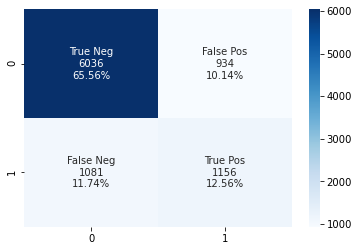

In [13]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.savefig('Decision_CM')

Due to this low accuracy score of the decision tree classifier, we will try the KNN classifier to see if it can predict the response varibale more accurately.

## KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
knnClassifier = KNeighborsClassifier(n_neighbors = k)
knnClassifier = knnClassifier.fit(x_train, y_train)
knnClassifier

KNeighborsClassifier(n_neighbors=4)

In [15]:
y_pred_knn = knnClassifier.predict(x_test)
y_pred_knn

array([1, 0, 0, ..., 0, 0, 0])

### Accuracy Score

In [16]:
train_accuracy_knn = accuracy_score(y_train, knnClassifier.predict(x_train))
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

print('Training set accuracy:', round(train_accuracy_knn, 2))
print('Test set accuracy:', round(test_accuracy_knn, 2))

Training set accuracy: 0.87
Test set accuracy: 0.81


The KNN classifer has a low accuracy in general. The classifer correctly predicted 87% of the training set y-values. However, the classifer only correctly predicts 81% of the y-values in the test set. This is higher than the decision tree classifier indicating that between the two classifiers, the KNN classifier would be better.
But, this relatively low accuracy shows that the KNN classification is not the opitmal machine learning model for this dataset.

### Confusion Matrix

In [17]:
labels = [0,1]
cm_knn = confusion_matrix(y_test, y_pred_knn, labels)
print(cm_knn)

[[6446  524]
 [1216 1021]]


Confusion matrix:

                Actual 0.  Actual 1
            
    Predicted 0 [6446          524]

    Predicted 1 [1216         1021]


Accuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation
        = 6446+1021/9207 = 0.811
        
Error= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation
     = 1216+524/9207 = 0.189
     
Precision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]
         = 6446/6446+524 = 0.925
         
Recall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]
      = 6446/6446+1216 = 0.841
      
Type I error= [Predicted 0 and Actual 1]= 524

Type II error= [Predicted 1 and Actual 0]=1216

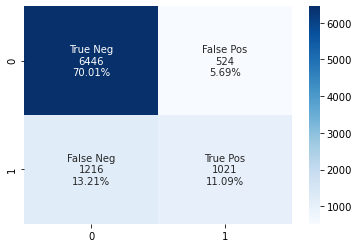

In [18]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm_knn.flatten()/np.sum(cm_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm_knn, annot=labels, fmt='', cmap='Blues')

plt.savefig('KNN_CM')

In conclusion, after conducting exploratory data analysis, data cleaning, and data mining, and looking at the data evaluation scores, it seems that the KNN classifier is the better ML model, compared to the decision tree classifier. However, we would suggest to look and apply other classification models to check if a higher accuracy score can be received.